![imagen](../resources/Nutrientes_units.png)

In [33]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from varname import nameof

import requests
from bs4 import BeautifulSoup
import html
import lxml

In [2]:
nutrition = pd.read_csv("../data/Nutritional_values.csv")
nutrition.set_index("name", inplace = True)
nutrition.drop("Unnamed: 0", axis = 1, inplace = True)
nutrition.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [3]:
key_nutrients = ["protein", "water", "fiber", "vitamin_a", "thiamin", "riboflavin", "niacin", "vitamin_b6", "vitamin_b12", "folate", "vitamin_c", "calcium", "irom", "magnesium", "potassium", "sodium", "zink"]

In [4]:
nutrition[key_nutrients].head(2)

,protein,water,fiber,vitamin_a,thiamin,riboflavin,niacin,vitamin_b6,vitamin_b12,folate,vitamin_c,calcium,irom,magnesium,potassium,sodium,zink
name,,,,,,,,,,,,,,,,,
Cornstarch,0.26 g,8.32 g,0.9 g,0.00 IU,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 mcg,0.00 mcg,0.0 mg,2.00 mg,0.47 mg,3.00 mg,3.00 mg,9.00 mg,0.06 mg
"Nuts, pecans",9.17 g,3.52 g,9.6 g,56.00 IU,0.660 mg,0.130 mg,1.167 mg,0.210 mg,0.00 mcg,22.00 mcg,1.1 mg,70.00 mg,2.53 mg,121.00 mg,410.00 mg,0.00 mg,4.53 mg


- protein -> ok
- water -> not ok -> needs conversion
- fiber -> ok
- vitamin_a -> check -> needs conversion
- thiamin -> ok
- rivoflabin -> ok
- niacin -> ok
- vitamin_b6 -> ok
- vitamin_b12 -> check -> ok
- folate -> check -> ok
- vitamin_c -> ok
- calcium -> ok
- irom -> ok
- magnesium -> ok
- potassium -> ok
- sodium -> ok
- zinc -> ok


mcg = µg

iu = international unit

https://www.greenfacts.org/glossary/mno/mass-units.htm

https://ods.od.nih.gov/factsheets/VitaminA-HealthProfessional/

In [5]:
nutrition.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [7]:
nutrition.iloc[1] / 

serving_size       100 g
calories             691
total_fat            72g
saturated_fat       6.2g
cholesterol            0
                  ...   
alcohol            0.0 g
ash               1.49 g
caffeine         0.00 mg
theobromine      0.00 mg
water             3.52 g
Name: Nuts, pecans, Length: 75, dtype: object

In [8]:
def num_cleaning(x):
    try:
        return re.match(r'[\d]*[\.\d]*', x)[0]
    except:
        return x

def to_float(x):
    try:
        return float(x)
    except:
        return x

In [12]:
nutrition = nutrition.applymap(num_cleaning).applymap(to_float)

In [29]:
# Checking how to divide two rows, as I will need it to compare the amount of nutrientes for each food compared to the recommended daily intake

In [15]:
nutrition.iloc[0]

serving_size     100.00
calories         381.00
total_fat          0.10
saturated_fat       NaN
cholesterol        0.00
                  ...  
alcohol            0.00
ash                0.09
caffeine           0.00
theobromine        0.00
water              8.32
Name: Cornstarch, Length: 75, dtype: float64

In [16]:
nutrition.iloc[1]

serving_size     100.00
calories         691.00
total_fat         72.00
saturated_fat      6.20
cholesterol        0.00
                  ...  
alcohol            0.00
ash                1.49
caffeine           0.00
theobromine        0.00
water              3.52
Name: Nuts, pecans, Length: 75, dtype: float64

In [28]:
test = pd.Series(map(lambda x, y: x / y if type(x) == float and type(y) == float and y > 0 else "-", nutrition.iloc[0], nutrition.iloc[1]))

test

0          1.0
1     0.551375
2     0.001389
3          NaN
4            -
        ...   
70           -
71    0.060403
72           -
73           -
74    2.363636
Length: 75, dtype: object

In [31]:
def daily_intake_info(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")

    di_table = soup.find(id = "tbl-calc")
    di_rows = di_table.find_all("tr")

    di_dict = {}

    for row in di_rows:
        items = row.find_all("td")
        if len(items) > 1:
            di_dict[items[0].text] = items[1].text

    s = pd.Series(di_dict)

    return s

In [34]:
url_w_30 = "https://www.eatforhealth.gov.au/node/1813927/done?sid=806757&token=05ce5572f5618ac641c9f2395b28c59f"

daily_intake_women_30 = daily_intake_info(url_w_30)

In [45]:
daily_intake_women_30 = daily_intake_women_30.map(num_cleaning).map(to_float)
daily_intake_women_30

Protein                                                   46.0
Fluids(Including plain water, milk and other drinks)       2.1
Fibre                                                     25.0
Vitamin A                                                700.0
Thiamin                                                    1.1
Riboflavin                                                 1.1
Niacin                                                    14.0
Vitamin B6                                                 1.3
Vitamin B12                                                2.4
Folate                                                   400.0
Vitamin C                                                 45.0
Calcium                                                 1000.0
Iodine                                                   150.0
Iron                                                      18.0
Magnesium                                                310.0
Potassium                                              

In [47]:
daily_intake_women_30.name = "daily_intake_women_30"

In [53]:
daily_intake_women_30.drop("Iodine", inplace = True)

In [55]:
daily_intake_women_30.index = key_nutrients
daily_intake_women_30

protein          46.0
water             2.1
fiber            25.0
vitamin_a       700.0
thiamin           1.1
riboflavin        1.1
niacin           14.0
vitamin_b6        1.3
vitamin_b12       2.4
folate          400.0
vitamin_c        45.0
calcium        1000.0
irom             18.0
magnesium       310.0
potassium      2800.0
sodium          460.0
zink              8.0
Name: daily_intake_women_30, dtype: float64

In [49]:
nutrition_key = nutrition[key_nutrients]
nutrition_key

,protein,water,fiber,vitamin_a,thiamin,riboflavin,niacin,vitamin_b6,vitamin_b12,folate,vitamin_c,calcium,irom,magnesium,potassium,sodium,zink
name,,,,,,,,,,,,,,,,,
Cornstarch,0.26,8.32,0.9,0.0,0.000,0.000,0.000,0.000,0.00,0.0,0.0,2.0,0.47,3.0,3.0,9.0,0.06
"Nuts, pecans",9.17,3.52,9.6,56.0,0.660,0.130,1.167,0.210,0.00,22.0,1.1,70.0,2.53,121.0,410.0,0.0,4.53
"Eggplant, raw",0.98,92.30,3.0,23.0,0.039,0.037,0.649,0.084,0.00,22.0,2.2,9.0,0.23,14.0,229.0,2.0,0.16
"Teff, uncooked",13.30,8.82,8.0,9.0,0.390,0.270,3.363,0.482,0.00,0.0,0.0,180.0,7.63,184.0,427.0,12.0,3.63
"Sherbet, orange",1.10,66.10,1.3,46.0,0.027,0.097,0.063,0.023,0.13,4.0,2.3,54.0,0.14,8.0,96.0,46.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Beef, raw, all grades, trimmed to 0"" fat, separable lean and fat, boneless, top round roast, round",23.45,72.51,0.0,11.0,0.063,0.234,6.422,0.631,1.64,4.0,0.0,13.0,2.33,12.0,311.0,54.0,3.67
"Lamb, cooked, separable lean only, composite of trimmed retail cuts, frozen, imported, New Zealand",29.59,59.95,0.0,0.0,0.130,0.500,7.680,0.140,2.95,0.0,0.0,13.0,2.35,22.0,188.0,50.0,4.30
"Lamb, raw, separable lean and fat, composite of trimmed retail cuts, frozen, imported, New Zealand",16.74,59.80,0.0,0.0,0.130,0.320,6.550,0.110,2.42,1.0,0.0,13.0,1.49,15.0,136.0,39.0,2.39


In [63]:
df = pd.DataFrame([nutrition_key.iloc[0], daily_intake_women_30])
df["tag"] = df.index
df

,protein,water,fiber,vitamin_a,thiamin,riboflavin,niacin,vitamin_b6,vitamin_b12,folate,vitamin_c,calcium,irom,magnesium,potassium,sodium,zink,tag
Cornstarch,0.26,8.32,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.47,3.0,3.0,9.0,0.06,Cornstarch
daily_intake_women_30,46.00,2.10,25.0,700.0,1.1,1.1,14.0,1.3,2.4,400.0,45.0,1000.0,18.00,310.0,2800.0,460.0,8.00,daily_intake_women_30


In [84]:
food = nutrition_key.iloc[0]
food_name = pd.Series(["Cornstarch" for i in range(17)])
food = food.reset_index()
food = pd.concat([food, food_name], axis = 1)
food.columns = ["nutrient", "quantity", "tag"]
food

,nutrient,quantity,tag
0,protein,0.26,Cornstarch
1,water,8.32,Cornstarch
2,fiber,0.90,Cornstarch
3,vitamin_a,0.00,Cornstarch
4,thiamin,0.00,Cornstarch
5,riboflavin,0.00,Cornstarch
6,niacin,0.00,Cornstarch
7,vitamin_b6,0.00,Cornstarch
8,vitamin_b12,0.00,Cornstarch
9,folate,0.00,Cornstarch


In [88]:
url_w_30 = "https://www.eatforhealth.gov.au/node/1813927/done?sid=806757&token=05ce5572f5618ac641c9f2395b28c59f"

daily_intake_women_30 = daily_intake_info(url_w_30)

daily_intake_women_30 = daily_intake_women_30.map(num_cleaning).map(to_float)

daily_intake_women_30.name = "daily_intake_women_30"

daily_intake_women_30.drop("Iodine", inplace = True)

daily_intake_women_30.index = key_nutrients

daily_intake_women_30 = daily_intake_women_30.reset_index()
di_name = pd.Series(["Daily_Intake" for i in range(17)])

daily_intake_women_30 = pd.concat([daily_intake_women_30, di_name], axis = 1)
daily_intake_women_30.columns = ["nutrient", "quantity", "tag"]
daily_intake_women_30

,nutrient,quantity,tag
0,protein,46.0,Daily_Intake
1,water,2.1,Daily_Intake
2,fiber,25.0,Daily_Intake
3,vitamin_a,700.0,Daily_Intake
4,thiamin,1.1,Daily_Intake
5,riboflavin,1.1,Daily_Intake
6,niacin,14.0,Daily_Intake
7,vitamin_b6,1.3,Daily_Intake
8,vitamin_b12,2.4,Daily_Intake
9,folate,400.0,Daily_Intake


In [89]:
final_df = pd.concat([food, daily_intake_women_30])
final_df

,nutrient,quantity,tag
0,protein,0.26,Cornstarch
1,water,8.32,Cornstarch
2,fiber,0.90,Cornstarch
3,vitamin_a,0.00,Cornstarch
4,thiamin,0.00,Cornstarch
5,riboflavin,0.00,Cornstarch
6,niacin,0.00,Cornstarch
7,vitamin_b6,0.00,Cornstarch
8,vitamin_b12,0.00,Cornstarch
9,folate,0.00,Cornstarch


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

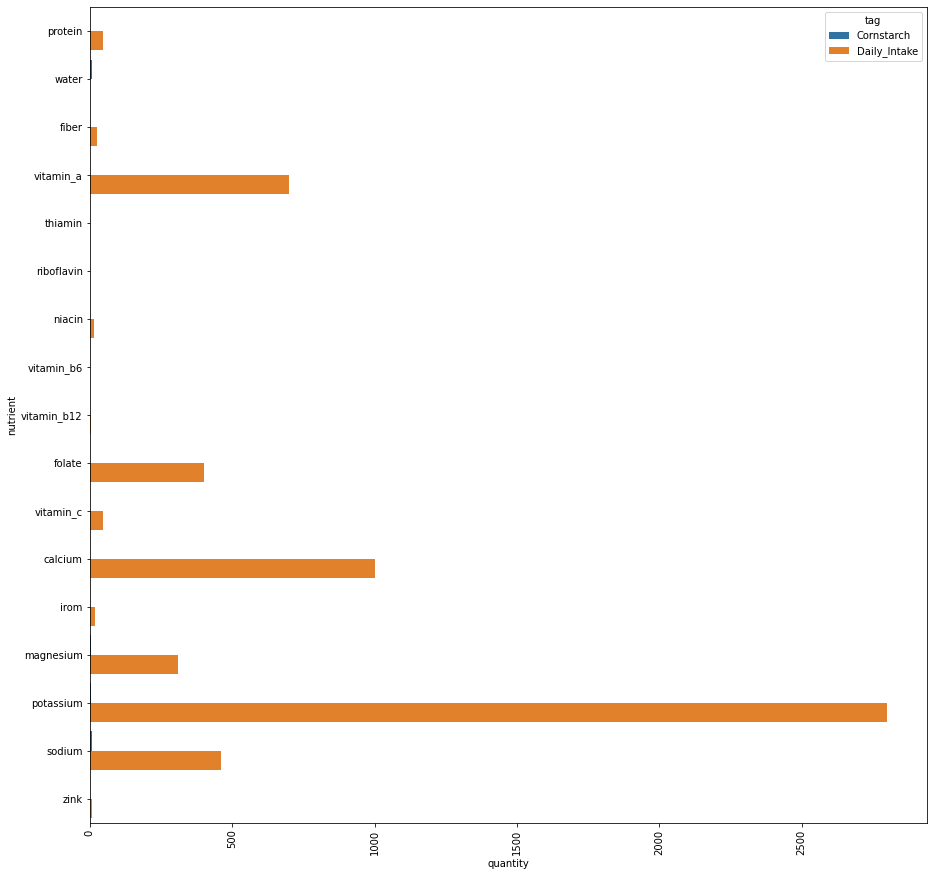

In [95]:
plt.figure(figsize = (15, 15))
sns.barplot(x = "quantity", y = "nutrient", hue = "tag", data = final_df, orient = "h")
plt.xticks(rotation = 90)

In [110]:
df2 = pd.DataFrame()
df2["%OfDailyIntake"] = food["quantity"] / daily_intake_women_30["quantity"]
df2["nutrient"] = food["nutrient"]
df2

,%OfDailyIntake,nutrient
0,0.005652,protein
1,3.961905,water
2,0.036000,fiber
3,0.000000,vitamin_a
4,0.000000,thiamin
5,0.000000,riboflavin
6,0.000000,niacin
7,0.000000,vitamin_b6
8,0.000000,vitamin_b12
9,0.000000,folate


In [125]:
df2[2:]["%OfDailyIntake"].max()

0.036000000000000004

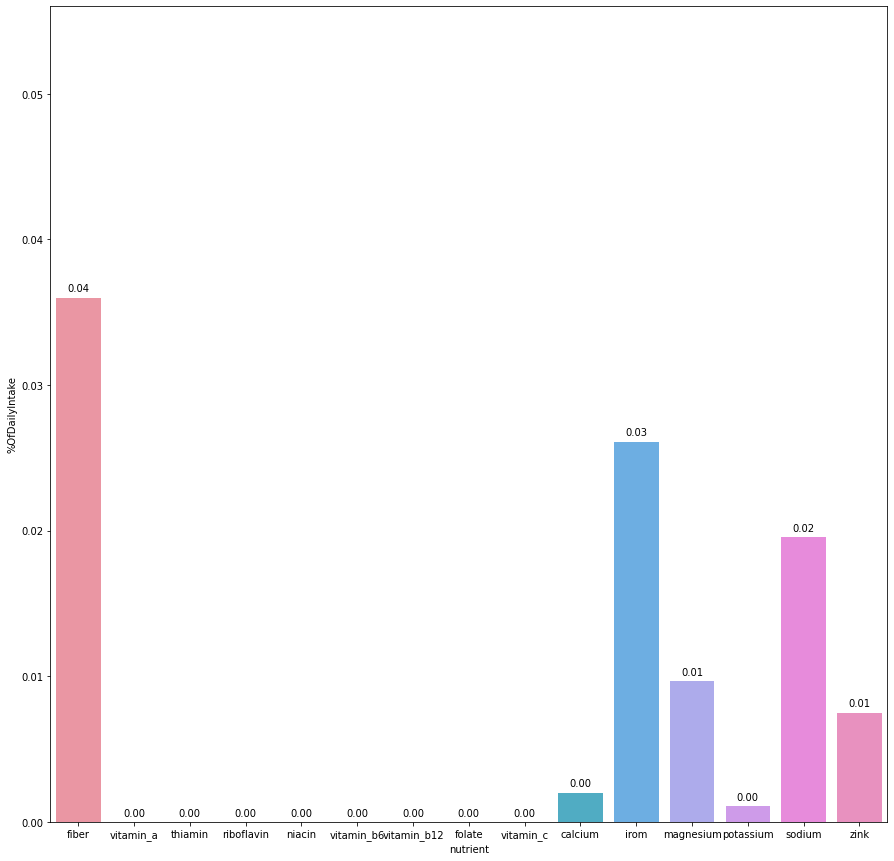

In [127]:
plt.figure(figsize = (15, 15))
splot = sns.barplot(x = "nutrient", y = "%OfDailyIntake", data = df2[2:])

plt.ylim(0, df2[2:]["%OfDailyIntake"].max() + 0.02)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [128]:
def gram_to_liter(x):
    return x * 0.001

In [130]:
x = 1
gram_to_liter(x)

0.001

In [131]:
def iu_to_mcg(x):
    # This is from international units to mcg retinol
    # I'll use this function to convert vimain a units to something that I can compare with the australian recommendation for daily intake
    return x * 0.3

In [133]:
x = 15
iu_to_mcg(x)

4.5

In [136]:
nutrition["water"] = nutrition["water"].map(gram_to_liter)
nutrition["water"]

name
Cornstarch                                                                                            0.00832
Nuts, pecans                                                                                          0.00352
Eggplant, raw                                                                                         0.09230
Teff, uncooked                                                                                        0.00882
Sherbet, orange                                                                                       0.06610
                                                                                                       ...   
Beef, raw, all grades, trimmed to 0" fat, separable lean and fat, boneless, top round roast, round    0.07251
Lamb, cooked, separable lean only, composite of trimmed retail cuts, frozen, imported, New Zealand    0.05995
Lamb, raw, separable lean and fat, composite of trimmed retail cuts, frozen, imported, New Zealand    0.05980
Beef,